In [150]:
import pandas as pd


In [151]:
#Import car data file
df=pd.read_csv('car data.csv')

In [152]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [153]:
df.shape

(301, 9)

In [154]:
df_new=df.drop('Car_Name', 1)

In [155]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 18.9+ KB


In [156]:
df_new['This_Year']=pd.datetime.now().year

df_new.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,This_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [157]:
df_new['#_years_old']=df_new['This_Year']- df_new['Year']
df_new.drop(['This_Year', 'Year'], axis=1, inplace=True)
df_new.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,#_years_old
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [158]:
df_new=pd.get_dummies(df_new,drop_first=True)

In [159]:
df_new.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,#_years_old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [160]:
df_new.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', '#_years_old',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual'],
      dtype='object')

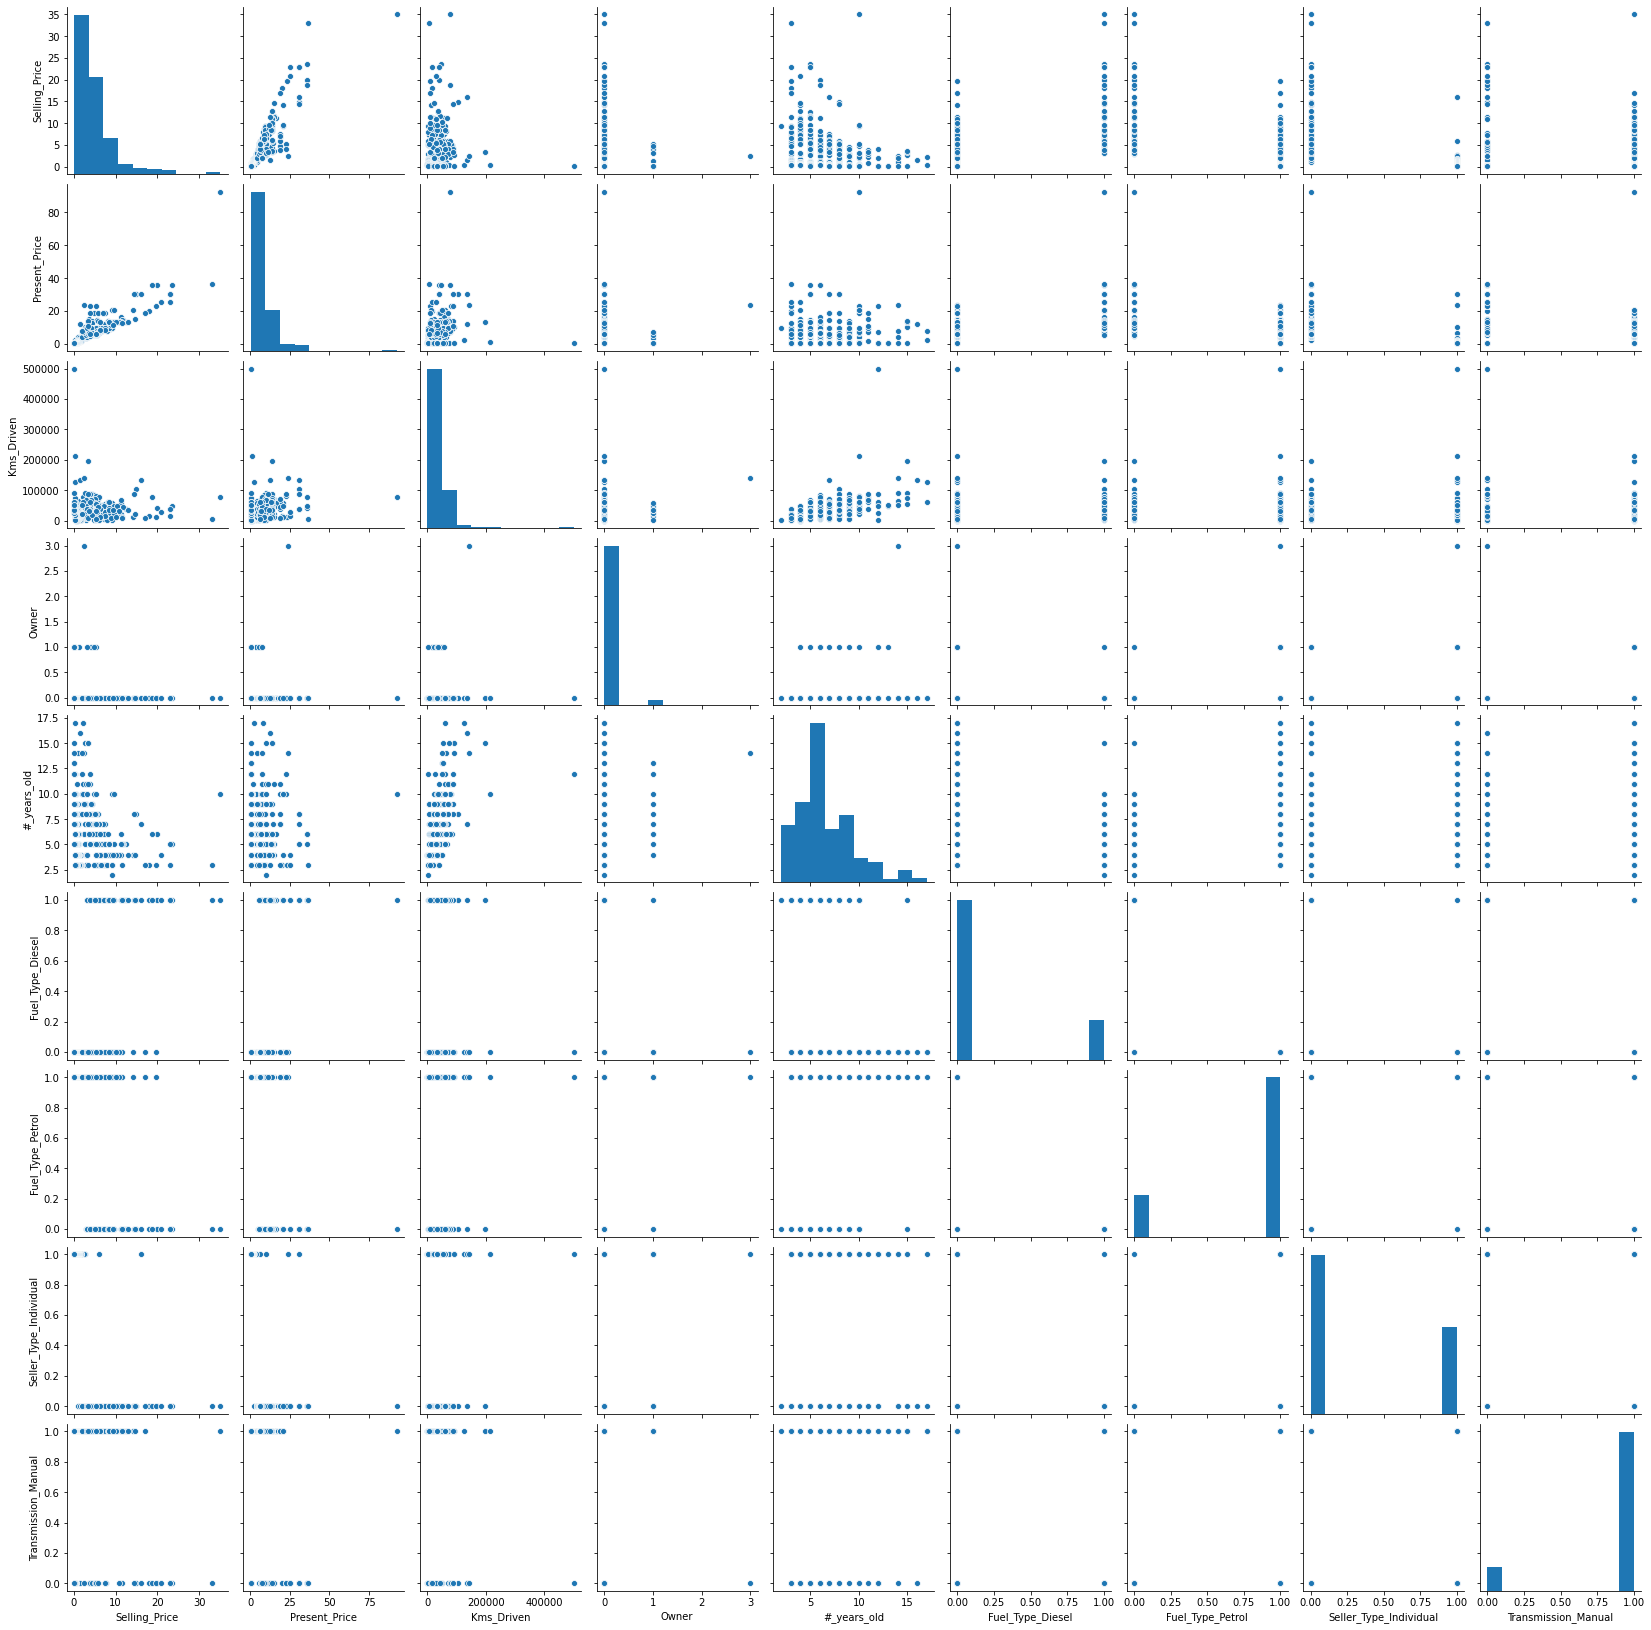

In [161]:
import seaborn as sns
sns.pairplot(df_new)



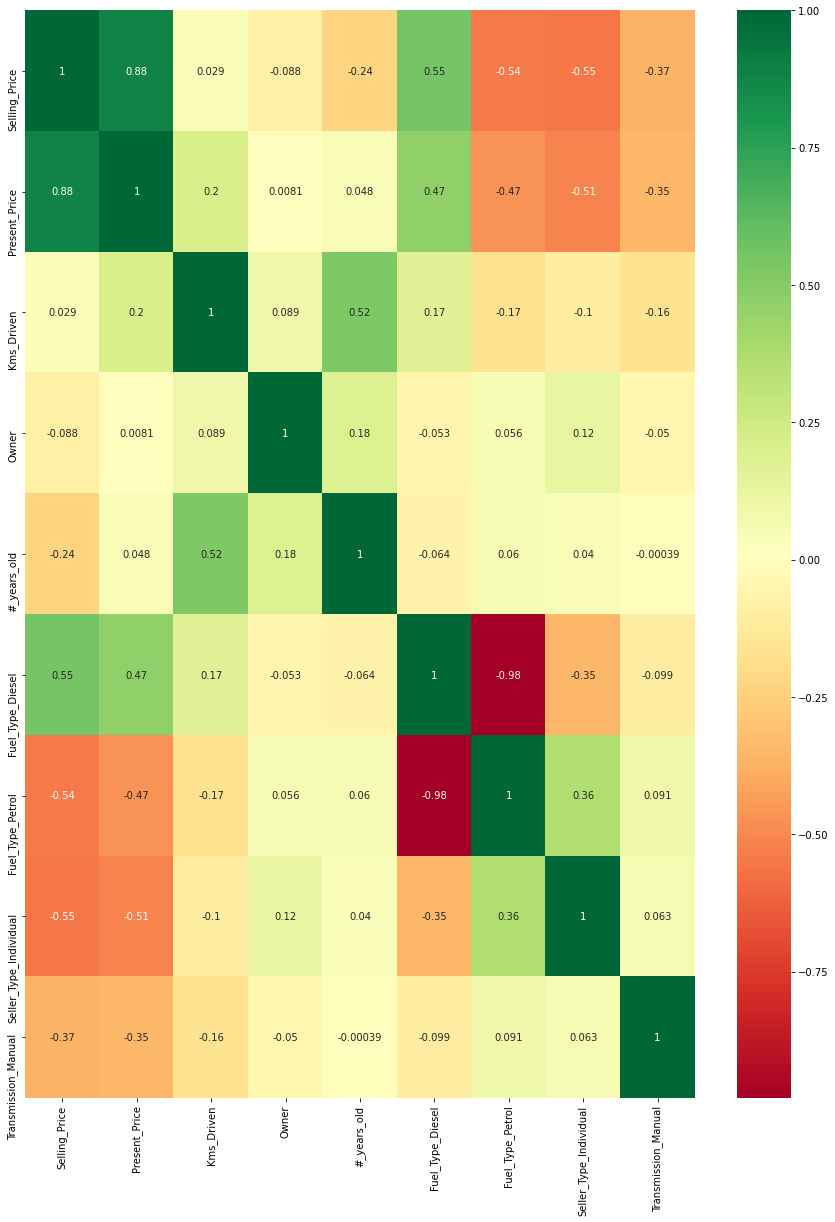

In [162]:
import matplotlib.pyplot as plt
#
top_features=df_new.corr().index
plt.figure(figsize=(15,20))
ax = sns.heatmap(df_new[top_features].corr(),annot=True,cmap="RdYlGn")


In [163]:
X=df_new.iloc[:,1:] # Input Features

y=df_new.iloc[:,0]  # Label/Output Feature
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [164]:
#feature importance
from sklearn.ensemble import ExtraTreesRegressor

model=ExtraTreesRegressor()
model.fit(X,y)
print(model.feature_importances_)

[0.43145982 0.04044854 0.00129405 0.08160791 0.19889551 0.01084339
 0.12518441 0.11026637]


<AxesSubplot:>

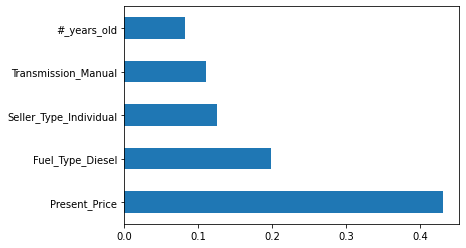

In [165]:
feature_importances=pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(5).plot(kind='barh') # Present price is the most important feature

In [166]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)




In [167]:
# In this project, we use DESCISION TREES and see how it performs

from sklearn.model_selection import RandomizedSearchCV

import numpy as np

# creating Hyperparameters

#1.No.of Trees
n_estimators =[int(x) for x in np.linspace(start=50,stop=1500, num=10)]
# No.of features for every split
feature_per_split = ['auto', 'sqrt']
# Depth of the tree
depth=[int(x) for x in np.linspace(start=10,stop=50, num=10)]
# No of samples for each split
samples_split=[2,3,10,15,75]
#No of samples for each leaf
samples_leaf=[1,2,5,10]




In [168]:
# Dictionary of random grid

rand_grid_dict={'n_estimators':n_estimators,
                'max_features':feature_per_split,
                'max_depth':depth,
                'min_samples_split':samples_split,
                'min_samples_leaf':samples_leaf
               
               }

print(rand_grid_dict)

{'n_estimators': [50, 211, 372, 533, 694, 855, 1016, 1177, 1338, 1500], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 14, 18, 23, 27, 32, 36, 41, 45, 50], 'min_samples_split': [2, 3, 10, 15, 75], 'min_samples_leaf': [1, 2, 5, 10]}


In [169]:
print(rand_grid_dict)

{'n_estimators': [50, 211, 372, 533, 694, 855, 1016, 1177, 1338, 1500], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 14, 18, 23, 27, 32, 36, 41, 45, 50], 'min_samples_split': [2, 3, 10, 15, 75], 'min_samples_leaf': [1, 2, 5, 10]}


In [170]:
# Performing Random grid search to tune hyperparmeters using 3 fold Cross vaildation with Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf_Search= RandomizedSearchCV(estimator=rf, param_distributions=rand_grid_dict, scoring='neg_mean_squared_error', n_iter=10, n_jobs=1, cv=3, verbose=2, random_state=2)
rf_Search.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_estimators=50, min_samples_split=75, min_samples_leaf=1, max_features=auto, max_depth=45 
[CV]  n_estimators=50, min_samples_split=75, min_samples_leaf=1, max_features=auto, max_depth=45, total=   0.0s
[CV] n_estimators=50, min_samples_split=75, min_samples_leaf=1, max_features=auto, max_depth=45 
[CV]  n_estimators=50, min_samples_split=75, min_samples_leaf=1, max_features=auto, max_depth=45, total=   0.0s
[CV] n_estimators=50, min_samples_split=75, min_samples_leaf=1, max_features=auto, max_depth=45 
[CV]  n_estimators=50, min_samples_split=75, min_samples_leaf=1, max_features=auto, max_depth=45, total=   0.0s
[CV] n_estimators=855, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=36 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  n_estimators=855, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=36, total=   0.7s
[CV] n_estimators=855, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=36 
[CV]  n_estimators=855, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=36, total=   0.7s
[CV] n_estimators=855, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=36 
[CV]  n_estimators=855, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=36, total=   0.7s
[CV] n_estimators=211, min_samples_split=75, min_samples_leaf=5, max_features=auto, max_depth=36 
[CV]  n_estimators=211, min_samples_split=75, min_samples_leaf=5, max_features=auto, max_depth=36, total=   0.2s
[CV] n_estimators=211, min_samples_split=75, min_samples_leaf=5, max_features=auto, max_depth=36 
[CV]  n_estimators=211, min_samples_split=75, min_samples_leaf=5, max_features=auto, max_depth=36, total=   0.2s
[CV] n_estimators=211, min_samples_spl

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   24.3s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [171]:
rf_Search.best_params_

{'n_estimators': 1338,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 36}

In [172]:
rf_Search.best_score_

-3.4434031068066226

In [173]:
rf_Search.best_index_

8

<AxesSubplot:xlabel='Selling_Price'>

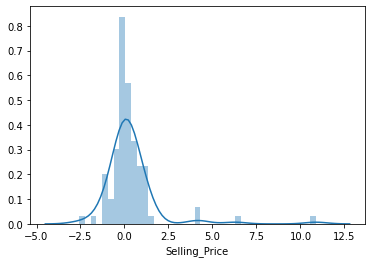

In [174]:

y_predicted=rf_Search.predict(X_test)
sns.distplot(y_test-y_predicted)

# Gives a good normal distribution with mean 0, which says the regression has sucessfuly predicted good values

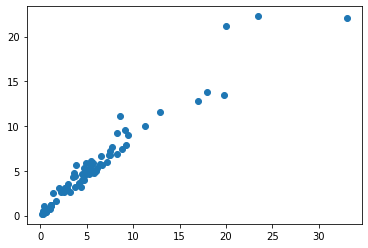

In [175]:
plt.scatter(y_test,y_predicted)

In [176]:
# Finally - The Metrics

from sklearn import metrics

print('Mean Absolute Error', metrics.mean_absolute_error(y_test,y_predicted))
print('Mean Squared Error', metrics.mean_squared_error(y_test,y_predicted))
print('R2', metrics.r2_score(y_test,y_predicted))
      

Mean Absolute Error 0.7668623827592476
Mean Squared Error 2.598002118378444
R2 0.9131278943347809
